In [3]:
import numpy as np
import seaborn as sb
import scipy.stats as sps
import matplotlib.pyplot as plt

### Zadanie 1

#### c)

In [4]:

#załadowanie danych
X = np.loadtxt("dane_lista1.txt")
Y = np.exp(X)

#### d)

<Axes: ylabel='Count'>

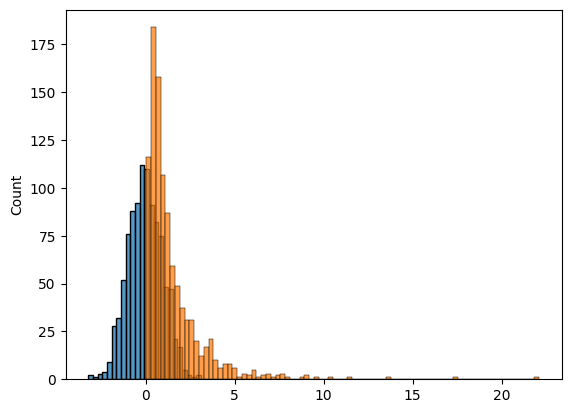

In [5]:
#histogramy liczności
sb.histplot(X,stat="count")
sb.histplot(Y,stat="count")

#### e)

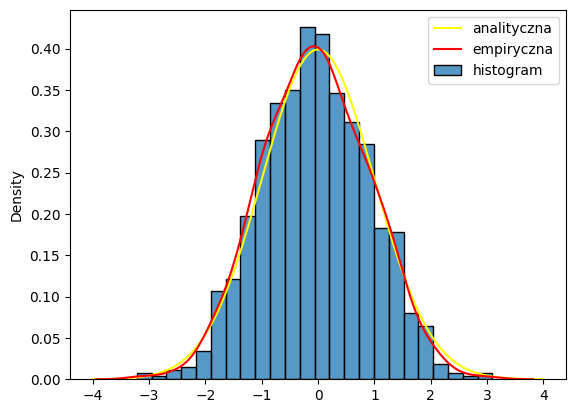

In [6]:
#histogram porównywany z gęstością dla X

#wyrysowanie analitycznej
rng = np.linspace(-4,4,1000)
analityc_x = sps.norm.pdf(rng,0,1)
plt.plot(rng,analityc_x, label="analityczna",color="yellow")

sb.histplot(X, stat='density', label="histogram")

sb.kdeplot(X, label="empiryczna", color ="red")

plt.legend()

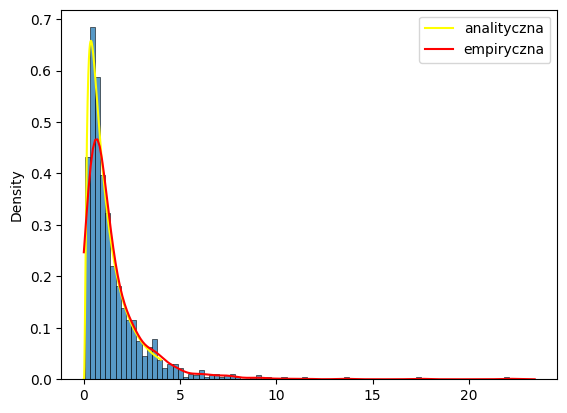

In [7]:
#histogram porównywany z gęstością dla Y

#przygotowanie analitycznej
rng = np.linspace(0,4,1000)
analityc_y = sps.lognorm.pdf(rng,1)

plt.plot(rng, analityc_y, label="analityczna", color="yellow")

sb.histplot(Y, stat='density')

sb.kdeplot(Y, label="empiryczna", color="red", clip=(0,25))

plt.legend()

### Zad 2

In [8]:
def parreto_dyst_odwr(a,l,n):
    u=np.random.random(n)
    result = (l/np.power(u,1/a)-l)
    return result

def parreto_dens(a,l,x):
    if x.any()>0:
        return a*np.power((l/l+x),a-1) * (l/np.power((l+x),2))
    else: 
        return 0    
    
def pareto_dens_wiki(k,x_m,x):
    if x.all() > 0:
        return (k*np.power(x_m,k))/np.power(x,k-1)
    else:
        return 0

### Zad 3


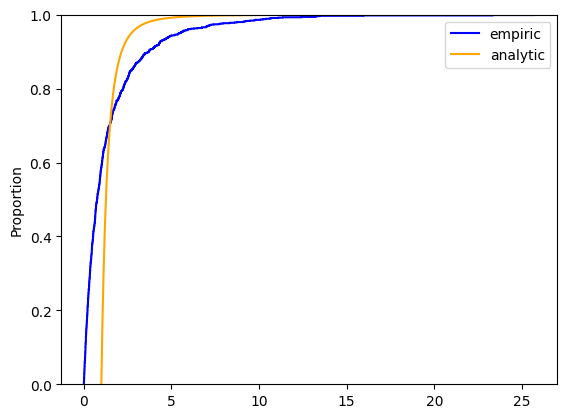

In [9]:
p = parreto_dyst_odwr(3,3,1000) #wygenerowanie danych

sb.ecdfplot(p, label="empiric", color="blue")  #dystrybuanta empiryczna z danych

rng = sps.pareto.rvs(3,size = 1000)
rng.sort()
teoretic_y = sps.pareto.cdf(rng,3)
plt.plot(rng, teoretic_y , label = "analytic", color = "orange")

plt.legend()

#tutaj coś jest nie tak z definicją dystrybuanty, są chyba różne

### Zad 4

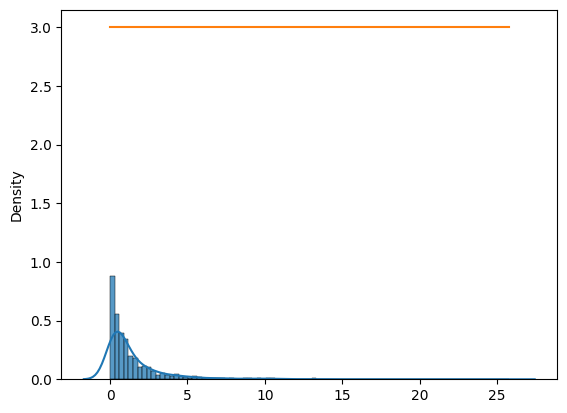

In [10]:
p # z poprzedniego zadania
sb.kdeplot(p)

sb.histplot(p, stat="density")

rng = np.linspace(min(p),max(p),len(p))
analytic_y = parreto_dens(3,1,rng)

plt.plot(rng, analytic_y)

### Zad 5

In [11]:
def burro(a,l,tau,n):
    result = parreto_dyst_odwr(a,l,n)
    result = np.power(result,1/tau)
    return result

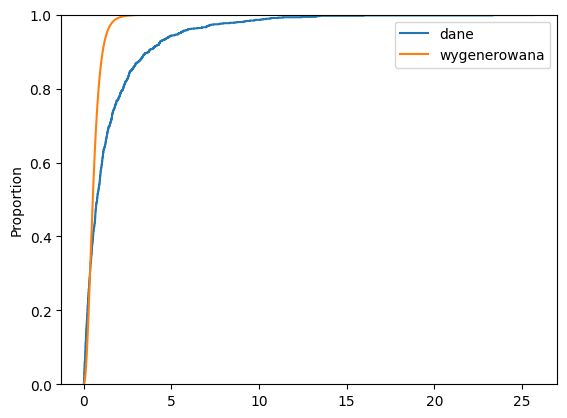

In [36]:
#nasza dystrybuanta
a=3
l=1
tau=2
burro_data = burro(a,l,tau,1000)
burro_dyst = sb.ecdfplot(p, label="dane")

#wygenerowana
range = np.linspace(0,25,len(burro_data))
gen_data = 1-np.power(1+np.power(range/l,tau),-a)
plt.plot(range,gen_data, label="wygenerowana")
plt.legend()